In [1]:
import numpy as np
import nibabel as nib
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import transforms

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
Train_dataset_path = '000000_BraTS2020/BraTS2020_TrainingData'

test_image_flair = nib.load(Train_dataset_path + '/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1,test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.max())

1854.603271484375
1.0


In [3]:
test_image_t1 = nib.load(Train_dataset_path + '/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1,test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce = nib.load(Train_dataset_path + '/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1,test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2 = nib.load(Train_dataset_path + '/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1,test_image_t2.shape[-1])).reshape(test_image_t2.shape)

In [4]:
test_image_mask = nib.load(Train_dataset_path + '/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_image_mask = test_image_mask.astype(np.uint8)

print(np.unique(test_image_mask))
test_image_mask[test_image_mask == 4] = 3
print(np.unique(test_image_mask))

[0 1 2 4]
[0 1 2 3]


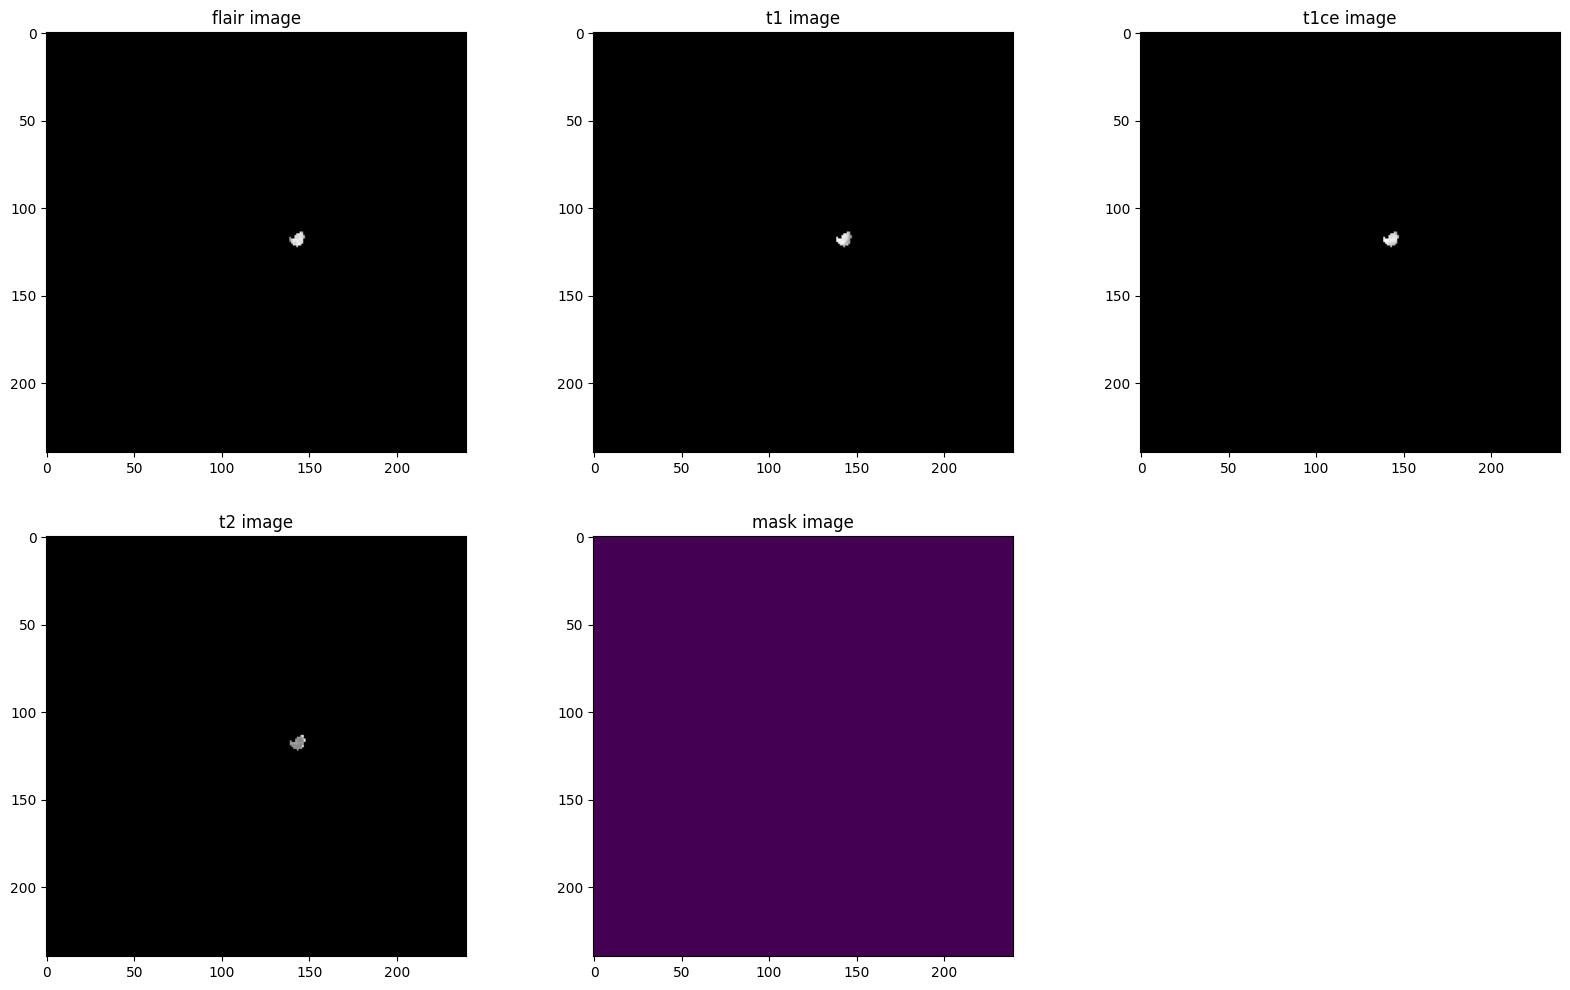

In [5]:
import random

n_slice = random.randint(0, test_image_mask.shape[2])

plt.figure(figsize=(20,12))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('flair image')

plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('t1 image')

plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('t1ce image')

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('t2 image')

plt.subplot(235)
plt.imshow(test_image_mask[:,:,n_slice])
plt.title('mask image')

plt.show()

In [6]:
combined_x = np.stack([test_image_flair,test_image_t1,test_image_t1ce,test_image_t2], axis=3)
combined_x.shape

(240, 240, 155, 4)

In [7]:
test_image_mask = nn.functional.one_hot(torch.tensor(test_image_mask, dtype=torch.long), num_classes=4)
test_image_mask.shape

torch.Size([240, 240, 155, 4])

In [8]:
combined_x = combined_x[56:184, 56:184, 13:141]

test_image_mask = test_image_mask[56:184, 56:184, 13:141]


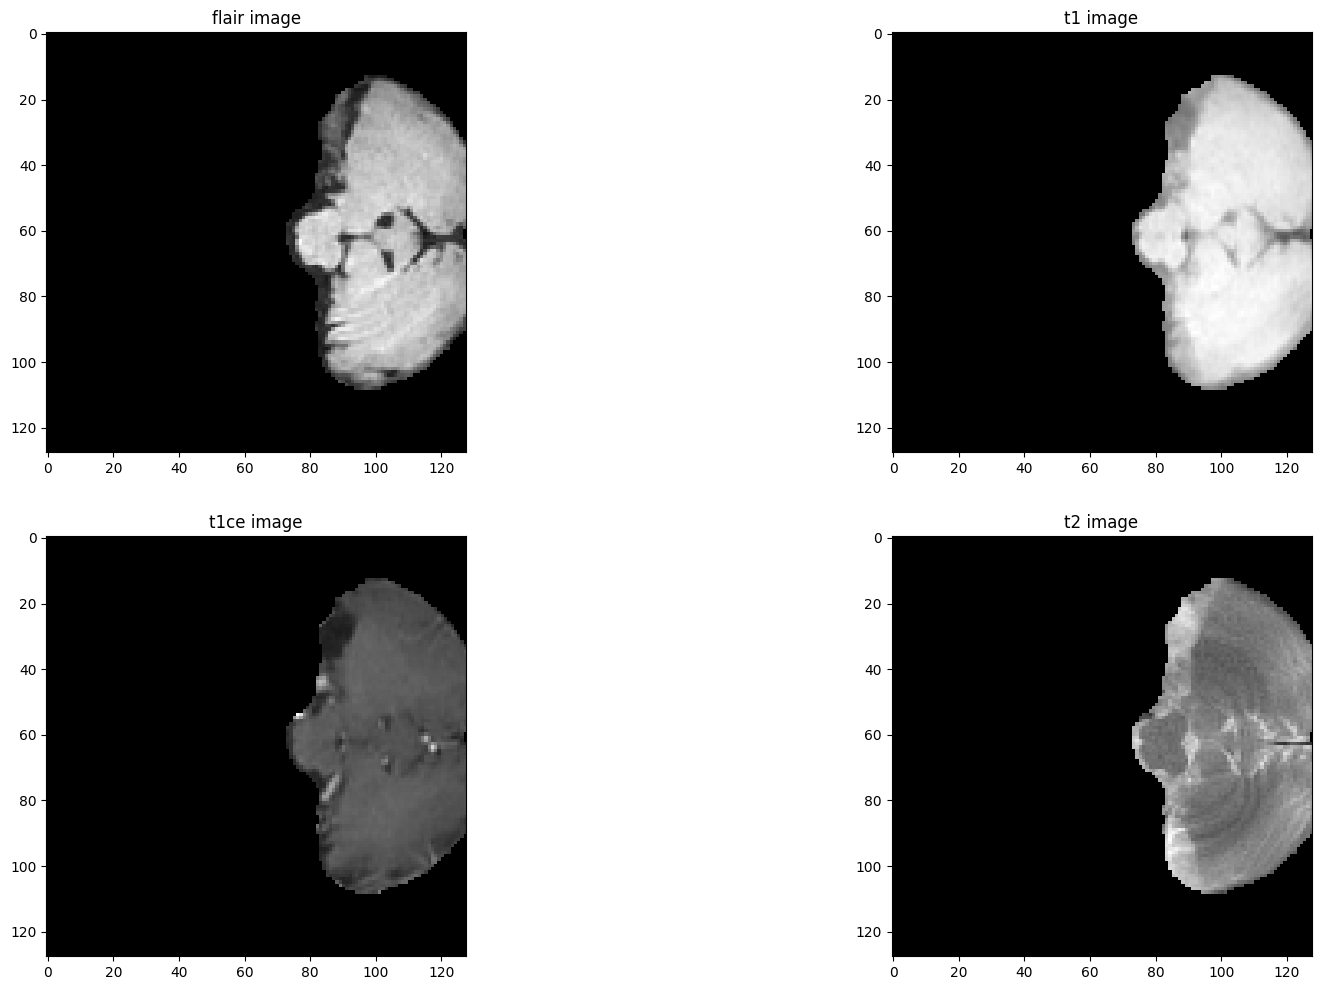

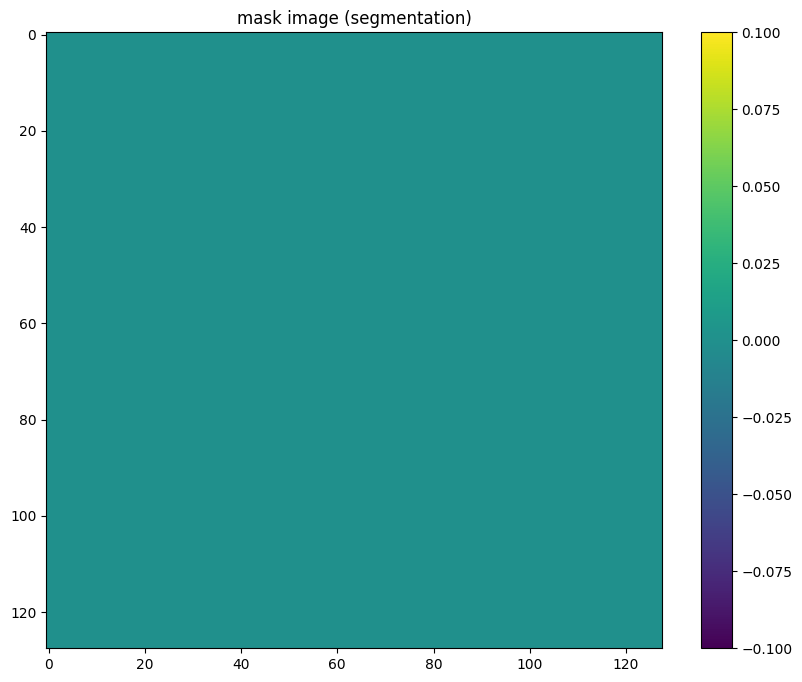

In [9]:
n_slice = random.randint(0, test_image_mask.shape[2])

plt.figure(figsize=(20,12))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title('flair image')

plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice,1], cmap='gray')
plt.title('t1 image')

plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice,2], cmap='gray')
plt.title('t1ce image')

plt.subplot(224)
plt.imshow(combined_x[:,:,n_slice,3], cmap='gray')
plt.title('t2 image')

plt.figure(figsize=(10,8))
mask_display = torch.argmax(test_image_mask[:,:,n_slice], dim=-1)
plt.imshow(mask_display)
plt.colorbar()
plt.title('mask image (segmentation)')
plt.show();

In [10]:
np.save('combined255.npy', combined_x)

In [11]:
from DataLoad import BraTSDataLoader

train_path = '000000_BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'

BraTSData_train= BraTSDataLoader(train_path)

In [12]:
for i, j in BraTSData_train:
    print(f"Train Input shape: {i.shape}")
    print(f"Train Label shape: {j.shape}")
    break
print(f"Toplam veri sayısı train: {len(BraTSData_train)}")

Train Input shape: torch.Size([128, 128, 128, 4])
Train Label shape: torch.Size([128, 128, 128, 4])
Toplam veri sayısı train: 369


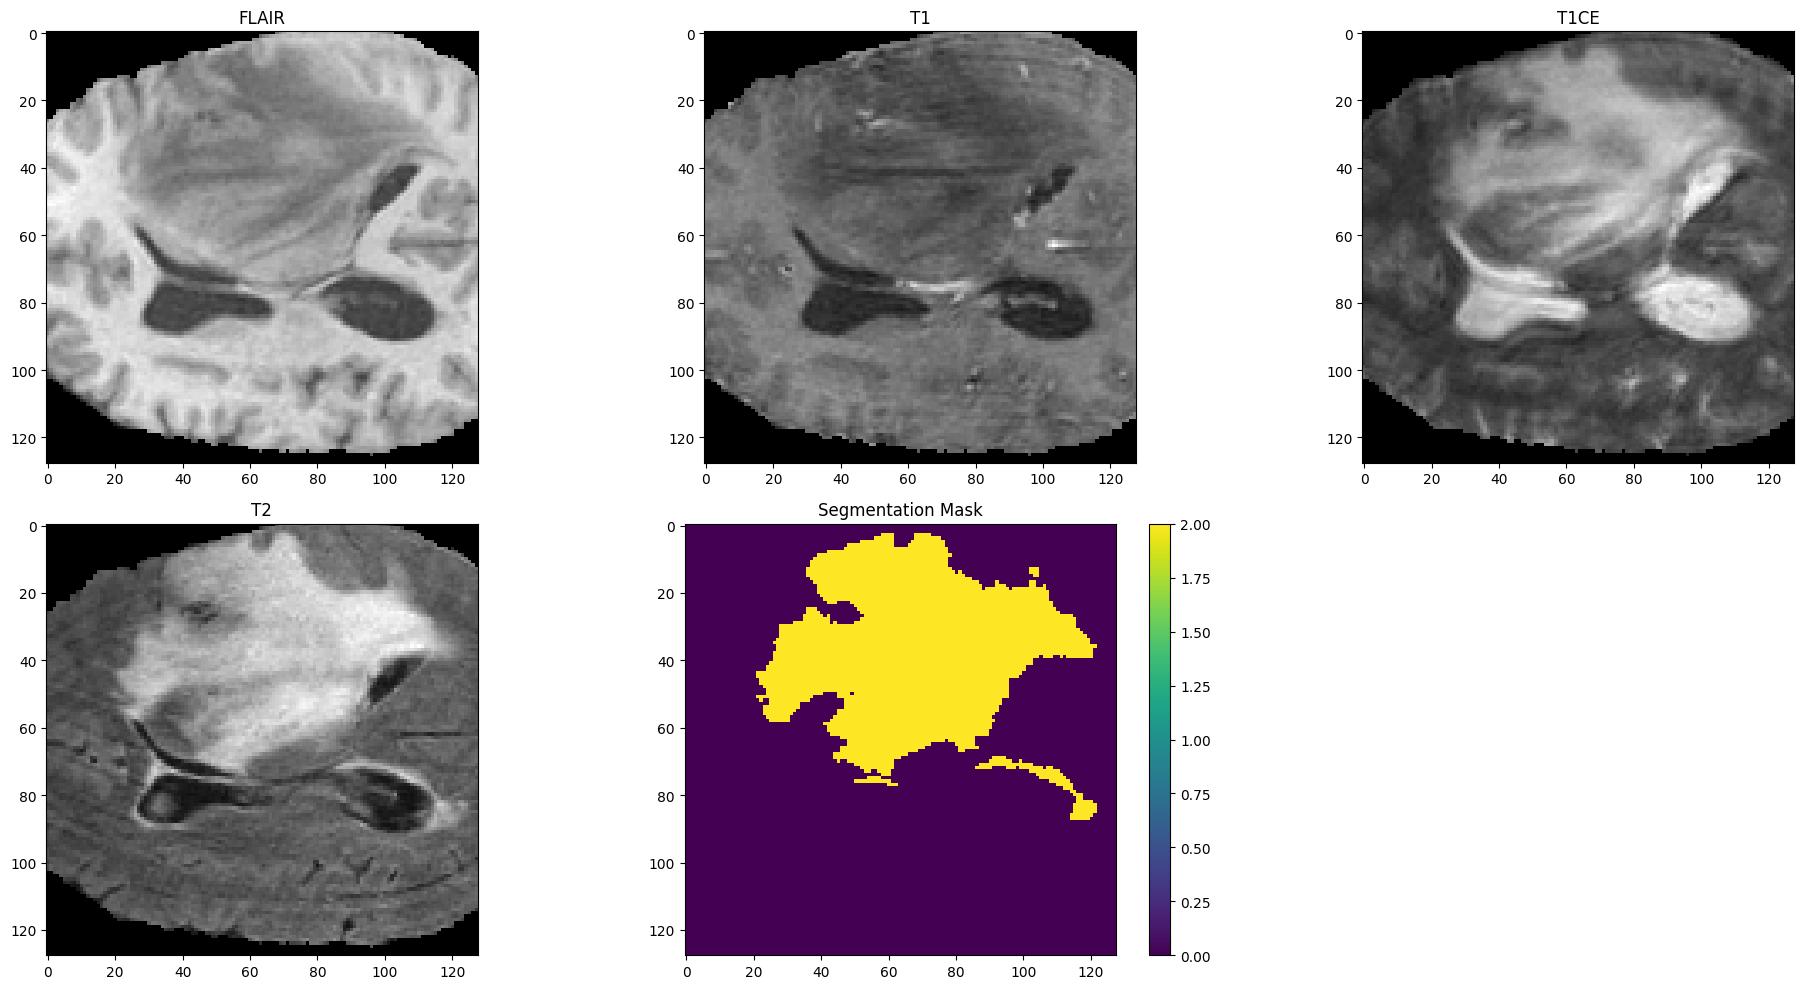

Slice index: 70
Unique values in segmentation mask: [0 2]


In [15]:
# Get a batch from the dataset
for batch_data, batch_labels in BraTSData_train:
    break  # Get only the first batch

# Select the first sample from the batch
a, b = BraTSData_train[0]
# Select a random slice for visualization
n_slice = random.randint(0, a.shape[2] - 1)

# Create a figure to display the data
plt.figure(figsize=(20, 10))

# Display the four modalities (FLAIR, T1, T1CE, T2)
plt.subplot(231)
plt.imshow(a[:, :, n_slice, 0].detach().cpu().numpy(), cmap='gray')
plt.title('FLAIR')

plt.subplot(232)
plt.imshow(a[:, :, n_slice, 1].detach().cpu().numpy(), cmap='gray')
plt.title('T1')

plt.subplot(233)
plt.imshow(a[:, :, n_slice, 2].detach().cpu().numpy(), cmap='gray')
plt.title('T1CE')

plt.subplot(234)
plt.imshow(a[:, :, n_slice, 3].detach().cpu().numpy(), cmap='gray')
plt.title('T2')

# Display the segmentation mask
plt.subplot(235)
mask_display = torch.argmax(b[:, :, n_slice], dim=-1).detach().cpu().numpy()
plt.imshow(mask_display)
plt.colorbar()
plt.title('Segmentation Mask')

plt.tight_layout()
plt.show()

print(f"Slice index: {n_slice}")
print(f"Unique values in segmentation mask: {np.unique(mask_display)}")

In [14]:

transform = transforms.compose([
    transforms.ToTensor(),
    transforms.Resize()
])


AttributeError: module 'torchvision.transforms' has no attribute 'compose'

In [ ]:
from torch.utils.data import DataLoader

dataset = DataLoader(BraTSData_train, batch_size=2, shuffle=True)


print(f"Toplam veri sayısı: {len(dataset)}")

Toplam veri sayısı: 185
